## Mark and recapture model
We take the earlier developed model of "Commited moose" (the ones that move in a straight line, and get reflected by enclosure borders). But also even before starting the movement, we mark all animals in one corner. It's like as if we captured them, marked them, and released them.
And then at some point in time we trap them again (look at all animals in this corner), count how many of them are marked (how many of them were captured before), and use this info to estimate the number of animals in the system.
(Here we of course have the God-like knowledge of the true number of animals in the system, so what we are trying to check is whether an estimation an ecologist would have made would have been reasonable.)

We'll use the following formula for the estimation (taken from Wikipedia): ${\displaystyle {\hat {N}}_{C}={\frac {(K+1)(n+1)}{k+1}}-1}$
And then, in practice, we'll make our 'fake ecologist' estimate the number of animals in the system at every step of the loop. Not because they would do so in practice (in practice they would have waited for some time of course, and then they would have re-traped the animals once or twice), but just because we can do it. And it can lead to useful predictions, like, when should an ecologist retrap the animals? How long should they wait?


In [2]:
import numpy as np 
import time 
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


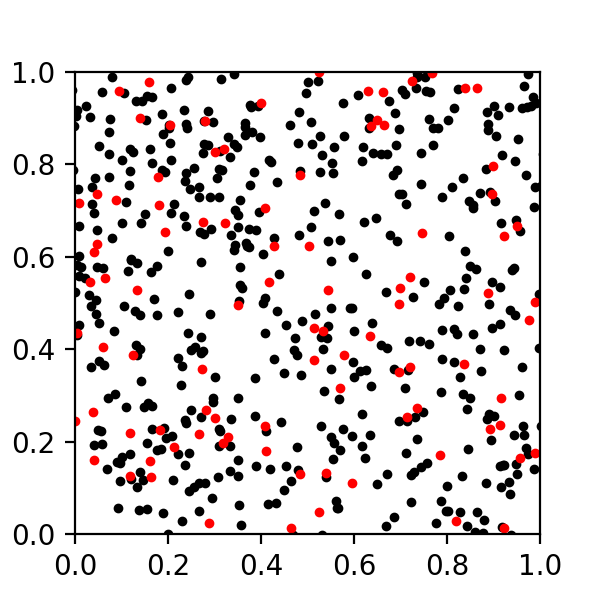

<IPython.core.display.Javascript object>


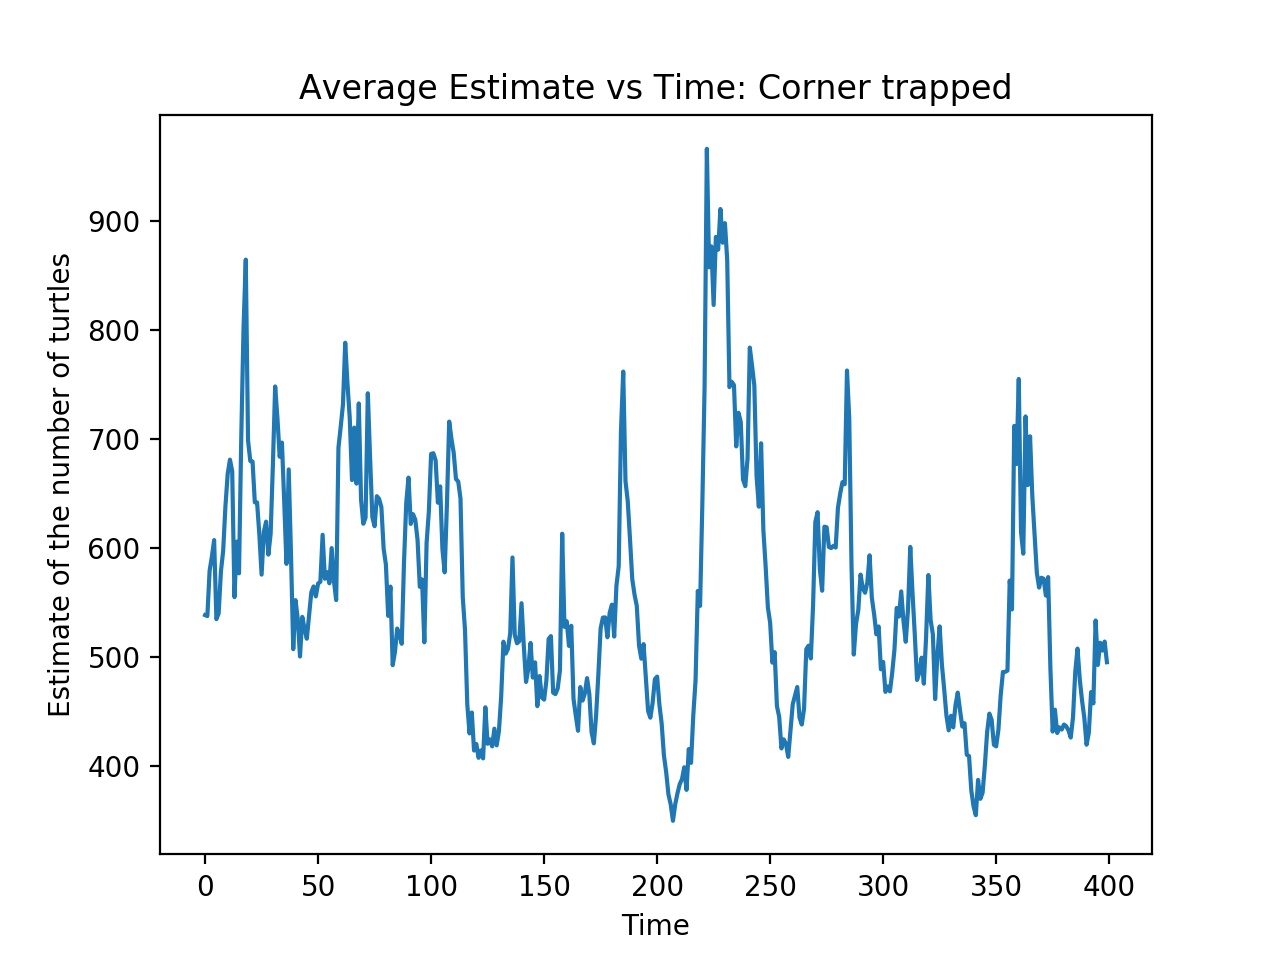

Text(0.5, 1.0, 'Average Estimate vs Time: Corner trapped')

In [46]:
%matplotlib notebook

n_animals = 600
n_steps = 400
vmin = 0.01
vmax = 0.05
trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"
history = np.zeros(n_steps) #ADDED FOR HW (History to remember past estimation)
ts1 = 0.3
ts2 = 0.6

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)

# Capture
color = np.where(np.logical_and(x<trap_size, y<trap_size), 1, 0) # All captured are color1, all free ones are color0
n_marked = np.sum(color)

estimation = np.zeros(n_steps) # At every point in time
                                # .. we'll remember the estimation for N an ecologist could have made 

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for a in range (3):
    
    for t in range(n_steps):
        # Moving elks around
        x += vx
        y += vy

        vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
        vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

        # Recapture
        n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
        n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color) # Condition1 AND cond2 AND color==1
        estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator

        ax.clear()
        plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
        plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
        plt.xlim((0,1));
        plt.ylim((0,1));
        fig.canvas.draw() # <--------------- The main command to make it move
        #time.sleep(0.5)
        
    history = (history + estimation)/2  #Add history to current estimation and divide by 2 to get average

plt.figure()
plt.plot(history)
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles')
plt.title('Average Estimate vs Time: Corner trapped')

<IPython.core.display.Javascript object>


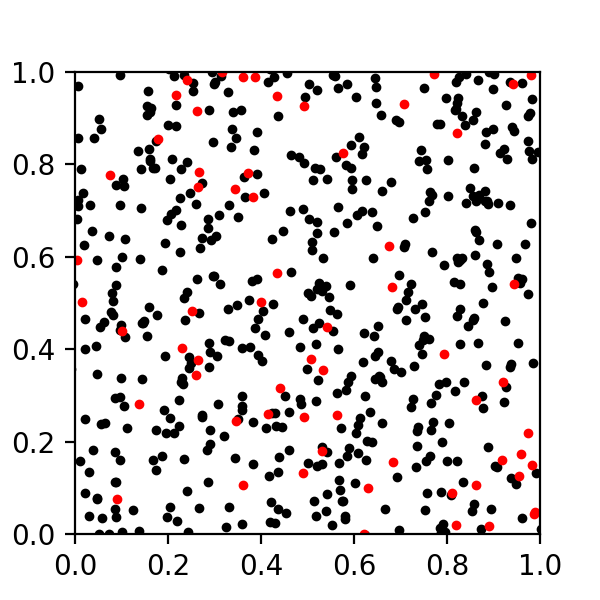

<IPython.core.display.Javascript object>


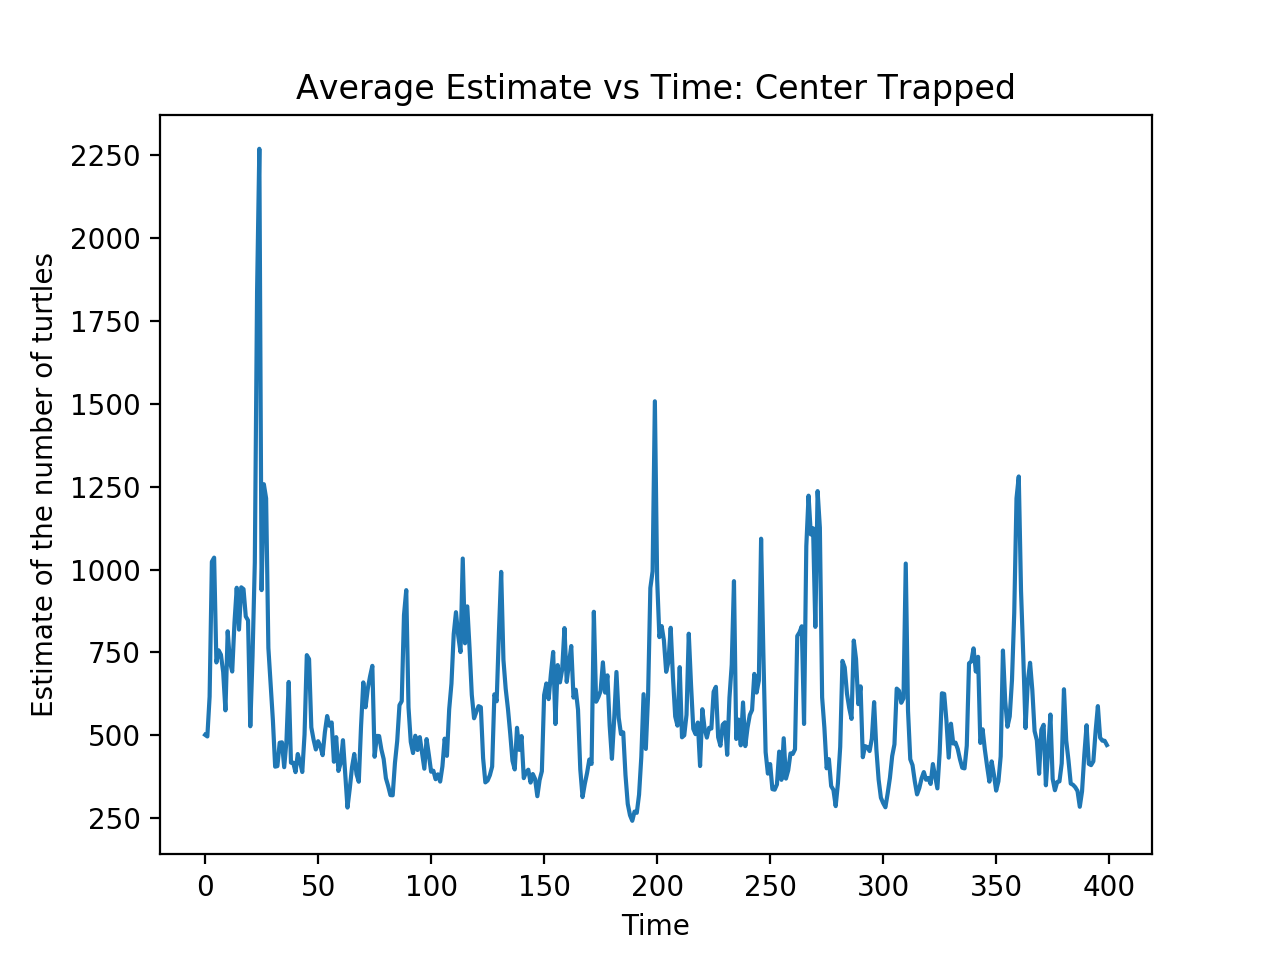

In [45]:
%matplotlib notebook

n_animals = 600
n_steps = 400
vmin = 0.01
vmax = 0.05
trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"
history = np.zeros(n_steps) #ADDED FOR HW (History to remember past estimation)
ts1 = 0.3
ts2 = 0.6
colors = np.zeros(n_animals)
deathrate = 0.001
birthrate = 0.002

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)

# Capture
#color = np.where(np.logical_and(x<trap_size,y<trap_size), 1, 0) # All captured are color1, all free ones are color0
#print(color)

#SET COLOR BASED ON CENTER 
for c in range(n_animals):
    if(x[c]>ts1 and x[c]<ts2) and (y[c]>ts1 and y[c]<ts2):
        colors[c] = 1
        #print("working")
    else: 
        colors[c] = 0 # All captured are color1, all free ones are color0
        #print("Setting black")
    
    
n_marked = np.sum(colors)
#print(colors)

estimation = np.zeros(n_steps) # At every point in time
                                # .. we'll remember the estimation for N an ecologist could have made 

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for a in range (3):
    
    for t in range(n_steps):
        # Moving elks around
        n_recaptured_marked = 0
        n_recaptured_total = 0
        
        x += vx
        y += vy

        vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
        vy = np.where(np.logical_or(y>1,y<0), -vy , vyc)

        # Recapture CENTER TRAPPED 
        for f in range(n_animals):
            if (x[f]>ts1 and x[f]<ts2) and (y[f]>ts1 and y[f]<ts2):
                n_recaptured_total += 1 
                n_recaptured_marked += (1*colors[f]) # Condition1 AND cond2 AND color==1
                
        estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator
       # print(n_recaptured_total, "MARKED:", n_recaptured_marked)
        

        ax.clear()
        plt.plot(x[colors==0], y[colors==0], 'k.',markersize=5);
        plt.plot(x[colors==1], y[colors==1], 'r.',markersize=5)
        plt.xlim((0,1));
        plt.ylim((0,1));
        fig.canvas.draw() # <--------------- The main command to make it move
        #time.sleep(0.5)
        
    history = (history + estimation)/2  #Add history to current estimation and divide by 2 to get average

plt.figure()
plt.plot(history)
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles')
plt.title('Average Estimate vs Time: Center Trapped');

## HW Notes 

* Note: I couldn't quite find a way to get both lines on one graph without making my computer overheat so I left them seperate

* When I think about it logically, it is better to set your trap for the center of the area. You are more likely to see an acurate sampling when collecting from the middle rather than from an edge where it is more random and inconsistent as to whether or not an acurate sampling will occur. However, my graphs seem to show the opposite, so it is likely I messed something up along the way. My first graph for corner trapped shows that the estimate stays a fair bit closer to the correct number of creatures tahn it does in the center trapped model.My best guess would be that for some reason, a corner sampling results in a more accurate representation but I don't understand why. I will also note that the center trapped method does result in much more extreme outliers which I cannot entirely make sense of. I also was unsure if I need to mark the animals from the center the first time as well when I was trapping in the center so I did but that might have messed my numbers?? I was unsuccesfull in adding the birth/death rates and they started to mess up my plots so I removed them but I will see if I can get any further before class. 